<a href="https://colab.research.google.com/github/danielosullivan2007/Teaching/blob/master/Working_with_Dates%2C_Text_and_HTML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dealing with Dates

In [0]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import re
import requests
from bs4 import BeautifulSoup

In [0]:
dates = ['2017/04/01', '2017/06/01', '2017/08/01']

In [52]:
datetime.strptime(dates[0], '%Y/%m/%d')

datetime.datetime(2017, 4, 1, 0, 0)

In [0]:
dates_datetime = [datetime.strptime(i, '%Y/%m/%d') for i in dates]

In [54]:
dates_df = pd.DataFrame({'dates':dates, 'values':[1,10,100]})
dates_df['dates'][0]


'2017/04/01'

In [56]:
dates_df['dates'] = pd.to_datetime(dates_df['dates'])
dates_df['dates'][0]

Timestamp('2017-04-01 00:00:00')

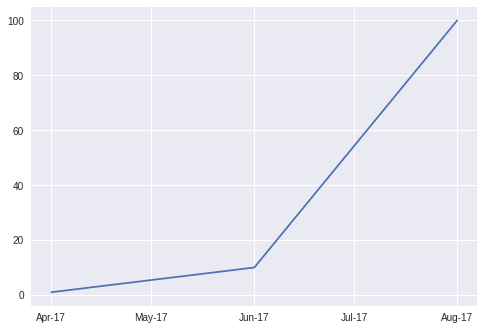

In [58]:
fig, ax =plt.subplots()
ax.plot(dates_df['dates'], dates_df['values'])

ax.xaxis.set_major_locator(mdates.MonthLocator()) #set ticks every month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y')) #set the format you want

In [50]:
dates_df['dates']

0   2017-04-13
1   2017-06-12
2   2017-08-12
Name: dates, dtype: datetime64[ns]

In [60]:
datetime.strftime(dates_df['dates'][0], '%B %Y')

'April 2017'

#Regular Expressions and Web Scraping



Regular Expressions search for a pattern in text. 

**re.findall** (*pattern*, *string*)

In [84]:
text = '''2,510,745 people were known to be in contact with secondary mental health, learning disabilities and autism services at some point in the 2017/18 year.'''

re.findall('people', text)


['people']

**\w**     Matches any single letter, digit or underscore.

**{ }**      Specifies number of times you want to repeat 

**+**        Keeps matching forward until it hits something that it isn't (**Greedy**)

**.**         Matches any character except newline (''\n')

In [0]:
re.findall(r'p\w\w\w', text)
#re.findall(r'p\w\w\w\w\w', text)
#re.findall(r'p\w{5}', text)
#re.findall(r'p\w+', text)

**\d** Matches any single digit

In [0]:
re.findall(r'\d,\d\d\d,\d\d\d people', text)

**( )** Returns what's inside brackets in pattern

In [0]:
re.findall(r'\d,(\d\d\d),\d\d\d', text)

**[ ]**  Matches a range, or whatever is inside

In [0]:
re.findall(r'[A-Za-z]', text)
re.findall(r'[A-Za-z]+', text)

**Requests** pulls the raw html. 

**Beautiful Soup ** used to parse the raw html

In [0]:
URL = 'http://www.england.nhs.uk/statistics/statistical-work-areas/eip-waiting-times/'


# Getting the webpage, creating a Response object.
response = requests.get(URL)

# Extracting the source code of the page.
html = response.text


In [218]:
soup = BeautifulSoup(html, "html.parser")
soup

<!DOCTYPE HTML>

<!--[if lt IE 7]><html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en-US"> <![endif]-->
<!--[if IE 7]><html class="no-js lt-ie9 lt-ie8" lang="en-US"> <![endif]-->
<!--[if IE 8]><html class="no-js lt-ie9" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>
<title>Statistics » Early Intervention in Psychosis Waiting Times</title>
<script type="text/javascript">
        var addthis_config =
        {
            ui_tabindex:0
        }
    </script>
<meta charset="utf-8"/>
<meta content="on" http-equiv="cleartype"/>
<meta content="Health and high quality care for all,  &lt;br /&gt;now and for future generations" name="description"/>
<meta content="Statistics" name="author"/>
<link href="https://www.england.nhs.uk/statistics/feed/" rel="alternate" title="RSS2.0" type="application/rss+xml"/>
<link href="https://www.england.nhs.uk/statistics/wp-content/themes/nhsengland/static/main.min.css?ver=4.9.9" id="main-css" media="s

Hyperlinks have "a href before them"
Use below to pull them all

In [0]:

url_links = [s.get('href') for s in soup.select('a[href^="https://"]')]



Use regex to find those which have EIP and xls (or csv)

In [217]:

#pattern1 = r'(.+EIP.+\.xls$)'
pattern2 = r'(.+EIP.+\.csv$)'

  
locations = [re.findall(pattern2, i) for i in url_links]
exl_links = [i for i in locations if i]
exl_links


[['https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2019/01/EIP-Waiting-Times-November-2018.csv'],
 ['https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2019/01/MH-EIP-Timeseries-History.csv']]

Open the csv directly into pandas once you have the hyperlink

In [194]:
pd.read_csv(exl_links[0][0])

,Early Intervention in Psychosis ( First Episode Psychosis FEP) - Provider/Commissioner Monthly CSV file,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Yearnumber:2018-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Periodname,Org code,Org name,Org Code,Org Name,Description,provupto2weeks,provgreaterthan2upto6weeks,provgreaterthan6upto12weeks,Eipw Gt12plus SUM,Total Pathways
4,NOVEMBER,RTQ,2GETHER NHS FOUNDATION TRUST,02Y,NHS EAST RIDING OF YORKSHIRE CCG,EIP pathways completed this month,0,1,0,0,1
5,NOVEMBER,RTQ,2GETHER NHS FOUNDATION TRUST,05F,NHS HEREFORDSHIRE CCG,EIP pathways completed this month,3,0,0,0,3
6,NOVEMBER,RTQ,2GETHER NHS FOUNDATION TRUST,10Q,NHS OXFORDSHIRE CCG,EIP pathways completed this month,0,0,0,0,0
7,NOVEMBER,RTQ,2GETHER NHS FOUNDATION TRUST,11M,NHS GLOUCESTERSHIRE CCG,EIP pathways completed this month,7,3,0,0,10
8,NOVEMBER,RVN,AVON AND WILTSHIRE MENTAL HEALTH PARTNERSHIP N...,05T,NHS SOUTH WORCESTERSHIRE CCG,EIP pathways completed this month,0,0,0,0,0
9,NOVEMBER,RVN,AVON AND WILTSHIRE MENTAL HEALTH PARTNERSHIP N...,11E,NHS BATH AND NORTH EAST SOMERSET CCG,EIP pathways completed this month,4,1,0,0,5
